In [1]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


In [2]:
%pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=587a4ee8ce4a1d55b53357ab84670ceafd7d928fa69e18119078853df97cb89f
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [3]:
!pip install yfinance

In [4]:
!pip install tensorflow

In [5]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.1 MB/s eta 0:00:00


In [6]:
import sys
print(sys.executable)

/usr/bin/python3


In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import keras_tuner as kt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


import plotly.graph_objects as go
from keras.callbacks import EarlyStopping


from pandas.tseries.offsets import BDay
from datetime import timedelta



In [8]:
Ticker = 'AAPL'

In [9]:
from datetime import datetime

end = datetime.now()
#end= datetime(2024, 5, 30)

start = datetime(1995, 1, 1)

In [10]:
df = yf.download("AAPL", start, end)

[*********************100%***********************]  1 of 1 completed


In [11]:
df.to_csv('AAPL_20yrs_stockdata.csv')

In [12]:
print("total no of days present:",df.shape[0])
print("total no of feild present:",df.shape[1])

total no of days present: 7705
total no of feild present: 5


In [13]:
df.shape

(7705, 5)

In [14]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1995-01-03,0.284755,0.288465,0.281045,0.288465,103868800
1995-01-04,0.292175,0.294030,0.286610,0.286610,158681600
1995-01-05,0.288465,0.292176,0.287537,0.291247,73640000
1995-01-06,0.311653,0.320002,0.305161,0.308871,1076622400
1995-01-09,0.305740,0.310726,0.304233,0.308871,274086400


In [15]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-08-07,219.780563,220.599641,216.334477,218.631873,90224800
2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000
2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100
2025-08-12,229.649994,230.800003,227.070007,228.009995,55626200
2025-08-13,233.330002,234.990005,230.429993,231.070007,69612104


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7705 entries, 1995-01-03 to 2025-08-13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   7705 non-null   float64
 1   (High, AAPL)    7705 non-null   float64
 2   (Low, AAPL)     7705 non-null   float64
 3   (Open, AAPL)    7705 non-null   float64
 4   (Volume, AAPL)  7705 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 361.2 KB


In [17]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,7705.000000,7705.000000,7705.000000,7705.000000,7.705000e+03
mean,37.905126,38.288622,37.484584,37.873533,3.747769e+08
std,61.740446,62.353237,61.057366,61.673911,3.753202e+08
min,0.097096,0.099442,0.095689,0.096627,2.323470e+07
25%,0.363994,0.371199,0.356279,0.363393,1.186556e+08
50%,7.277778,7.341721,7.192820,7.261266,2.601312e+08
75%,38.217319,38.572167,37.808233,38.231373,4.897984e+08
max,258.103729,259.179926,256.718662,257.276679,7.421641e+09


#Cheking for Null Values

In [18]:
print("Null Value:",df.isnull().values.sum())

Null Value: 0


In [19]:
print("NA Values:",df.isnull().values.any())

NA Values: False


In [20]:
print(df.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


#Data Preprocessing

In [21]:
#printing starting and ending date of dataset
startdate=df.index[0]
enddate=df.index[-1]

In [22]:
print("starting date of dataset is:",startdate)
print("ending date of dataset is:",enddate)

starting date of dataset is: 1995-01-03 00:00:00
ending date of dataset is: 2025-08-13 00:00:00


In [23]:
# Single stock — no loop needed!
print(f"Columns: {list(df.columns)}")

Columns: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


In [24]:
# Check and flatten MultiIndex for a single stock
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]


In [25]:
# If you have a single DataFrame `df` for AAPL
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]  # Take only first level

print(f"Flattened columns: {list(df.columns)}")

Flattened columns: ['Close', 'High', 'Low', 'Open', 'Volume']


In [26]:
# Required columns
required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# Make a clean copy
df_clean = df.copy()

#Check which required columns exist
existing_cols = [col for col in required_cols if col in df_clean.columns]

if not existing_cols:
    print(f"Skipping: Missing essential OHLCV columns.")
else:
    #Convert to float safely
    for col in existing_cols:
        try:
            df_clean[col] = df_clean[col].astype(float)
        except Exception as e:
            print(f"Could not convert {col}: {e}")
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # Drop rows with missing values
    df_clean.dropna(subset=existing_cols, inplace=True)

    # Ensure index is datetime
    if not pd.api.types.is_datetime64_any_dtype(df_clean.index):
        try:
            df_clean.index = pd.to_datetime(df_clean.index)
        except Exception as e:
            print(f"Invalid datetime index: {e}")
#Replace original df if you want
df = df_clean


#EDA

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


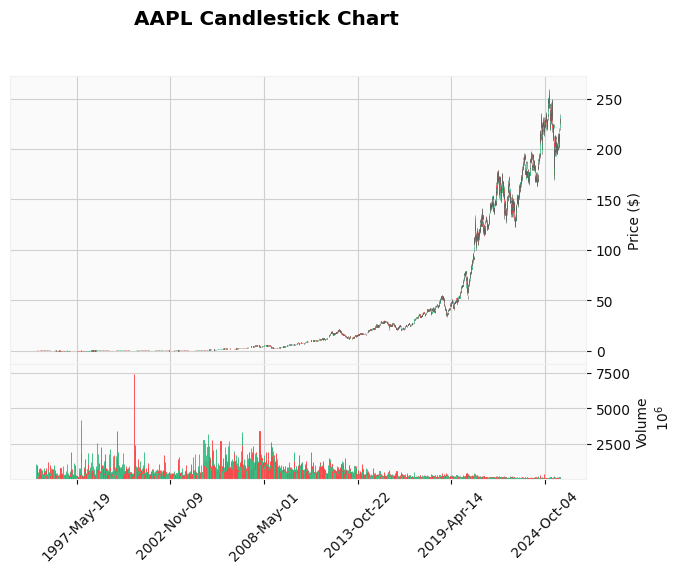

In [27]:
# ===========================================
# ✅ EDA Step 1 — Candlestick Chart for Apple
# ===========================================

import mplfinance as mpf

# Make sure the index is datetime
df.index = pd.to_datetime(df.index)

# Check the columns (optional)
print(df.columns)

# Plot candlestick chart with volume
mpf.plot(
    df,
    type='candle',         # Candlestick chart
    style='yahoo',         # Yahoo Finance style
    volume=True,           # Add volume subplot
    title='AAPL Candlestick Chart',
    ylabel='Price ($)',
    ylabel_lower='Volume',
    show_nontrading=True   # Include non-trading days as gaps
)


#Raw Price Trend

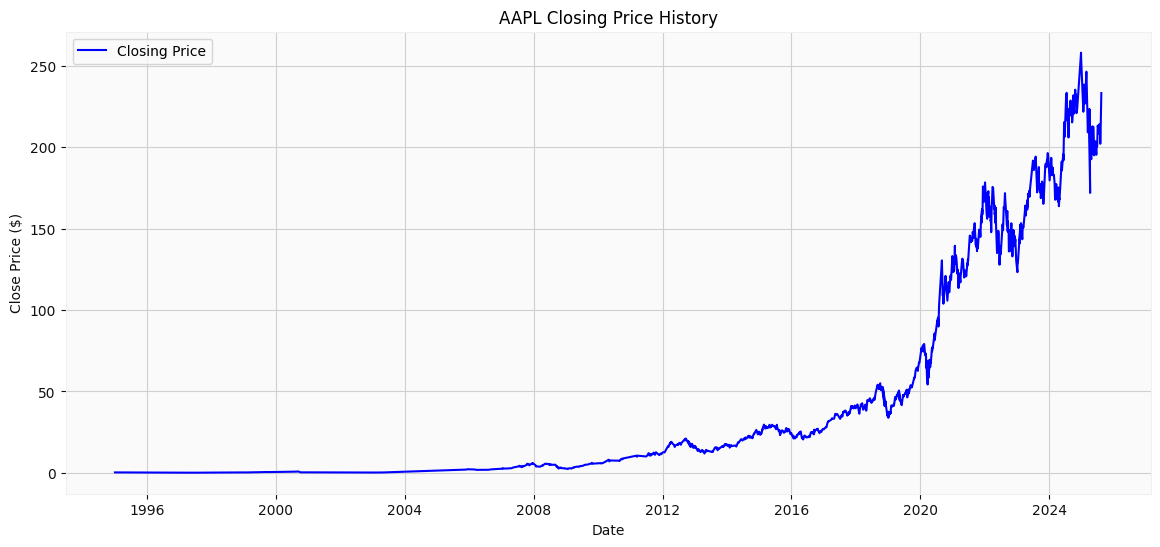

In [28]:
# ===========================================
# ✅ EDA Step 2 — Line Plot: Closing Price
# ===========================================

import matplotlib.pyplot as plt

# Make sure your index is datetime
df.index = pd.to_datetime(df.index)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')

plt.title('AAPL Closing Price History')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.show()


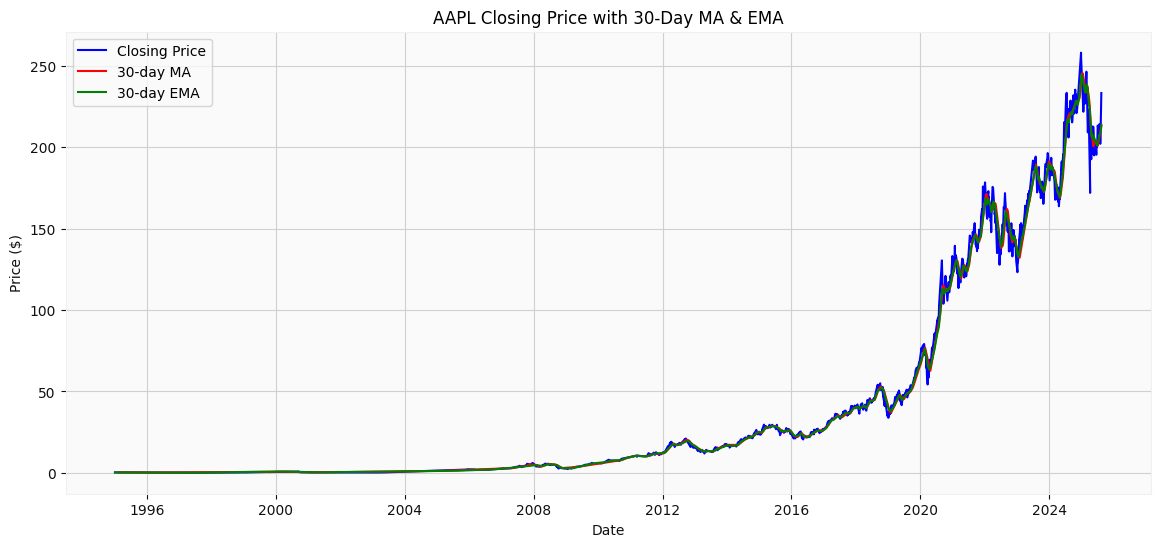

In [29]:
# ===========================================
# ✅ EDA Step 3 — Closing Price with MA & EMA
# ===========================================

import matplotlib.pyplot as plt

# Make sure your index is datetime
df.index = pd.to_datetime(df.index)

# Create 30-day Moving Average (MA) and Exponential Moving Average (EMA)
df['MA30'] = df['Close'].rolling(window=30).mean()
df['EMA30'] = df['Close'].ewm(span=30, adjust=False).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['MA30'], label='30-day MA', color='red')
plt.plot(df['EMA30'], label='30-day EMA', color='green')

plt.title('AAPL Closing Price with 30-Day MA & EMA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


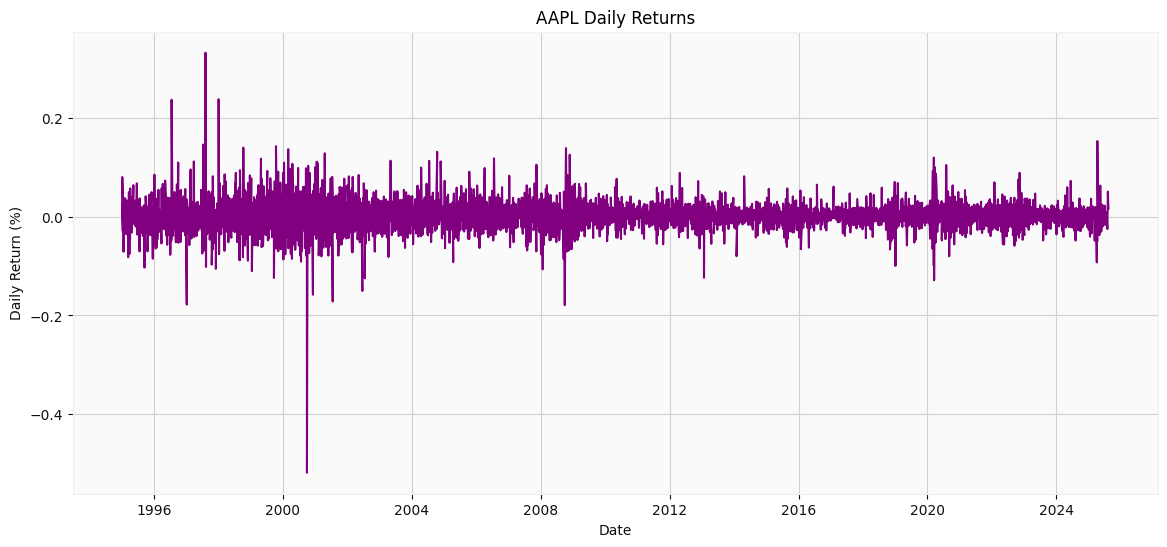

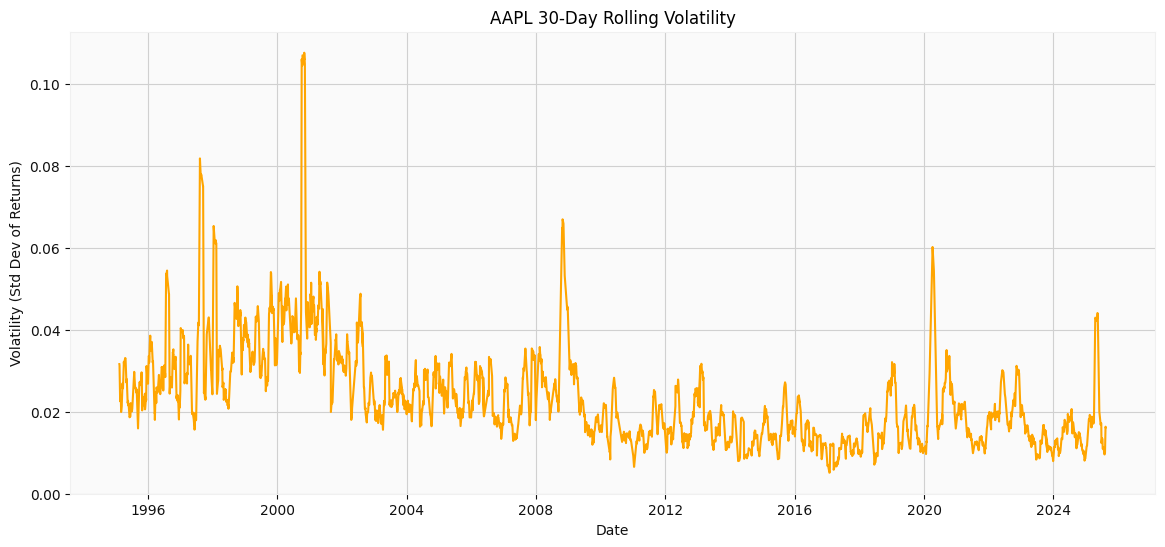

In [30]:
# ===========================================
# ✅ EDA Step 4 — Daily Returns & Volatility
# ===========================================

import matplotlib.pyplot as plt

# Make sure index is datetime
df.index = pd.to_datetime(df.index)

# Calculate daily returns
df['Returns'] = df['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 6))
plt.plot(df['Returns'], label='Daily Returns', color='purple')
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.show()

# Calculate 30-day rolling volatility (standard deviation of returns)
df['Volatility'] = df['Returns'].rolling(window=30).std()

# Plot rolling volatility
plt.figure(figsize=(14, 6))
plt.plot(df['Volatility'], label='30-Day Rolling Volatility', color='orange')
plt.title('AAPL 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev of Returns)')
plt.grid(True)
plt.show()


<Figure size 1400x500 with 0 Axes>

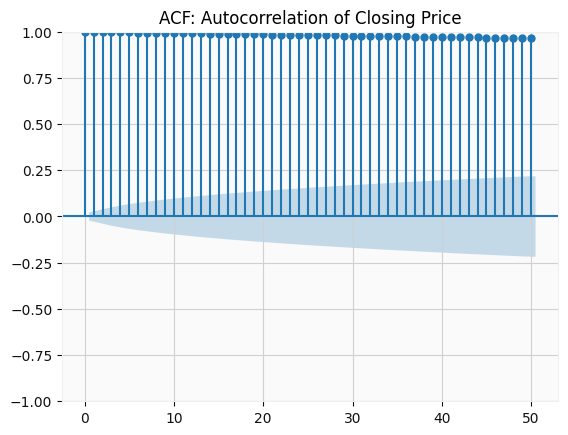

<Figure size 1400x500 with 0 Axes>

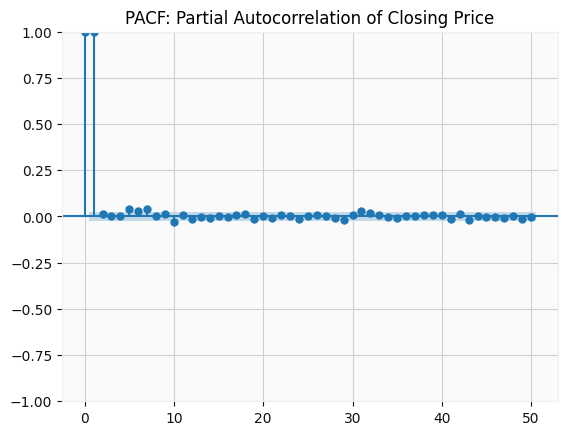

In [31]:
# ===========================================
# ✅ EDA Step 5 — ACF & PACF Plots
# ===========================================

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Drop NA just in case
close_prices = df['Close'].dropna()

# Plot ACF
plt.figure(figsize=(14, 5))
plot_acf(close_prices, lags=50)
plt.title('ACF: Autocorrelation of Closing Price')
plt.show()

# Plot PACF
plt.figure(figsize=(14, 5))
plot_pacf(close_prices, lags=50)
plt.title('PACF: Partial Autocorrelation of Closing Price')
plt.show()


#Feature Engineering

#Technical Indicator

In [33]:
def add_custom_indicators(df):
    df = df.copy()

    df["lag_1"] = df["Close"].shift(1)
    df["lag_2"] = df["Close"].shift(2)

    df["momentum"] = df["Close"] - df["lag_1"]

    # EMA (Exponential Moving Average)
    df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
    df["ema_diff"] = df["Close"] - df["EMA_10"]

    # SMA (Simple Moving Average)
    df['SMA_10'] = df['Close'].rolling(window=10).mean()
    df['SMA_20'] = df['Close'].rolling(window=20).mean()

    # RSI (Relative Strength Index)
    df["rsi"] = ta.momentum.RSIIndicator(df["Close"]).rsi()

    # MACD & MACD Histogram
    df["macd"] = ta.trend.MACD(df["Close"]).macd()

    # OBV (vectorized)
    df['OBV_in_million'] = ta.volume.OnBalanceVolumeIndicator(df['Close'], df['Volume']).on_balance_volume() / 1e6

    return df


In [34]:
df = add_custom_indicators(df)

In [35]:
df

,Close,High,Low,Open,Volume,MA30,EMA30,Returns,Volatility,lag_1,lag_2,momentum,EMA_10,EMA_50,ema_diff,SMA_10,SMA_20,rsi,macd,OBV_in_million
Date,,,,,,,,,,,,,,,,,,,,
1995-01-03,0.284755,0.288465,0.281045,0.288465,1.038688e+08,NaN,0.284755,NaN,NaN,NaN,NaN,NaN,0.284755,0.284755,0.000000,NaN,NaN,NaN,NaN,103.868800
1995-01-04,0.292175,0.294030,0.286610,0.286610,1.586816e+08,NaN,0.285234,0.026060,NaN,0.284755,NaN,0.007421,0.286104,0.285046,0.006071,NaN,NaN,NaN,NaN,262.550400
1995-01-05,0.288465,0.292176,0.287537,0.291247,7.364000e+07,NaN,0.285442,-0.012700,NaN,0.292175,0.284755,-0.003711,0.286533,0.285180,0.001932,NaN,NaN,NaN,NaN,188.910400
1995-01-06,0.311653,0.320002,0.305161,0.308871,1.076622e+09,NaN,0.287133,0.080387,NaN,0.288465,0.292175,0.023189,0.291101,0.286218,0.020553,NaN,NaN,NaN,NaN,1265.532800
1995-01-09,0.305740,0.310726,0.304233,0.308871,2.740864e+08,NaN,0.288334,-0.018973,NaN,0.311653,0.288465,-0.005913,0.293762,0.286984,0.011978,NaN,NaN,NaN,NaN,991.446400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-07,219.780563,220.599641,216.334477,218.631873,9.022480e+07,209.674040,208.858957,0.031794,0.014544,213.008255,202.689957,6.772308,210.295271,208.089443,9.485293,209.537198,210.400716,66.226006,0.995547,167945.455900
2025-08-08,229.090012,230.738135,219.001455,220.579666,1.138540e+08,210.617969,210.164186,0.042358,0.016167,219.780563,213.008255,9.309448,213.712496,208.912995,15.377515,211.082445,211.309185,73.662439,2.432395,168059.309900
2025-08-11,227.179993,229.559998,224.759995,227.919998,6.180610e+07,211.495567,211.261980,-0.008337,0.016322,229.090012,219.780563,-1.910019,216.161132,209.629348,11.018861,212.419708,212.249010,70.245035,3.378045,167997.503800


In [36]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'MA30', 'EMA30', 'Returns',
       'Volatility', 'lag_1', 'lag_2', 'momentum', 'EMA_10', 'EMA_50',
       'ema_diff', 'SMA_10', 'SMA_20', 'rsi', 'macd', 'OBV_in_million'],
      dtype='object')

In [37]:
# Define your features list
features_df = [
     'High', 'Low', 'Open', 'Volume', 'MA30', 'EMA30', 'Returns',
       'Volatility', 'lag_1', 'lag_2', 'momentum', 'EMA_10', 'EMA_50',
       'ema_diff', 'SMA_10', 'SMA_20', 'rsi', 'macd', 'OBV_in_million'
]

# Drop rows with any NaN in features or target
df_clean = df[features_df + ['Close']].dropna()

print(f"✅ Shape after dropping NaNs: {df_clean.shape}")


✅ Shape after dropping NaNs: (7675, 20)


In [38]:
df_clean

,High,Low,Open,Volume,MA30,EMA30,Returns,Volatility,lag_1,lag_2,momentum,EMA_10,EMA_50,ema_diff,SMA_10,SMA_20,rsi,macd,OBV_in_million,Close
Date,,,,,,,,,,,,,,,,,,,,
1995-02-14,0.328321,0.317160,0.325531,165614400.0,0.314294,0.309514,-0.018571,0.031617,0.325531,0.324639,-0.006045,0.315193,0.304931,0.004294,0.311784,0.311295,56.795334,0.003767,2039.072000,0.319486
1995-02-15,0.323671,0.316230,0.321811,184475200.0,0.315111,0.309978,-0.008736,0.031430,0.319486,0.325531,-0.002791,0.315466,0.305392,0.001229,0.313679,0.310203,54.551238,0.003680,1854.596800,0.316695
1995-02-16,0.321811,0.317160,0.320881,218780800.0,0.316207,0.310711,0.014687,0.031351,0.316695,0.319486,0.004651,0.316535,0.306018,0.004811,0.314927,0.309250,57.560668,0.003942,2073.377600,0.321346
1995-02-17,0.319951,0.316230,0.319021,121788800.0,0.316360,0.311067,-0.015920,0.028021,0.321346,0.316695,-0.005116,0.316480,0.306418,-0.000249,0.316498,0.309247,53.374355,0.003693,1951.588800,0.316230
1995-02-21,0.318090,0.304139,0.317160,301582400.0,0.316338,0.310680,-0.035295,0.028572,0.316230,0.321346,-0.011161,0.314405,0.306365,-0.009336,0.316952,0.308825,45.584956,0.002566,1650.006400,0.305069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-07,220.599641,216.334477,218.631873,90224800.0,209.674040,208.858957,0.031794,0.014544,213.008255,202.689957,6.772308,210.295271,208.089443,9.485293,209.537198,210.400716,66.226006,0.995547,167945.455900,219.780563
2025-08-08,230.738135,219.001455,220.579666,113854000.0,210.617969,210.164186,0.042358,0.016167,219.780563,213.008255,9.309448,213.712496,208.912995,15.377515,211.082445,211.309185,73.662439,2.432395,168059.309900,229.090012
2025-08-11,229.559998,224.759995,227.919998,61806100.0,211.495567,211.261980,-0.008337,0.016322,229.090012,219.780563,-1.910019,216.161132,209.629348,11.018861,212.419708,212.249010,70.245035,3.378045,167997.503800,227.179993


In [39]:
print(df_clean.isnull().sum())

High              0
Low               0
Open              0
Volume            0
MA30              0
EMA30             0
Returns           0
Volatility        0
lag_1             0
lag_2             0
momentum          0
EMA_10            0
EMA_50            0
ema_diff          0
SMA_10            0
SMA_20            0
rsi               0
macd              0
OBV_in_million    0
Close             0
dtype: int64


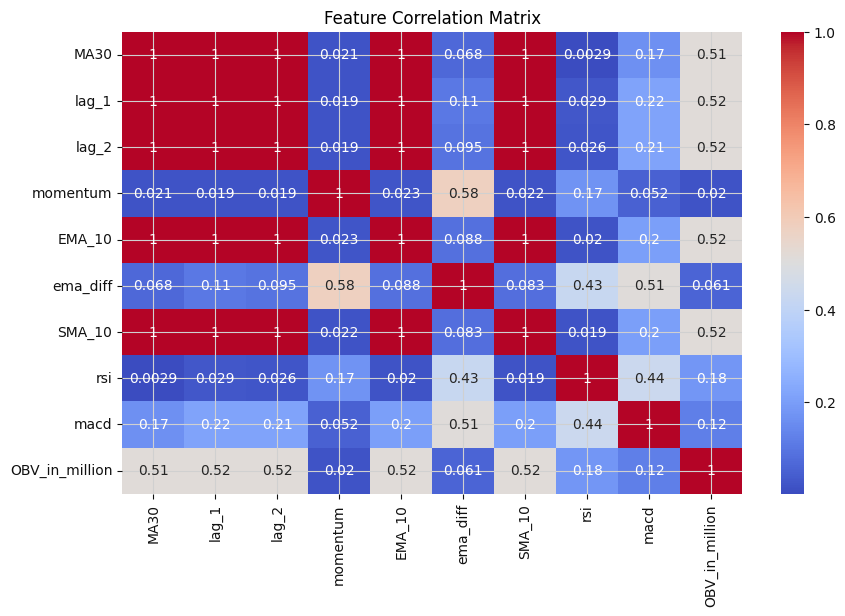

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['MA30','lag_1', 'lag_2', 'momentum', 'EMA_10', 'ema_diff','SMA_10', 'rsi', 'macd', 'OBV_in_million']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

100%|===================| 7668/7669 [05:30<00:00]       

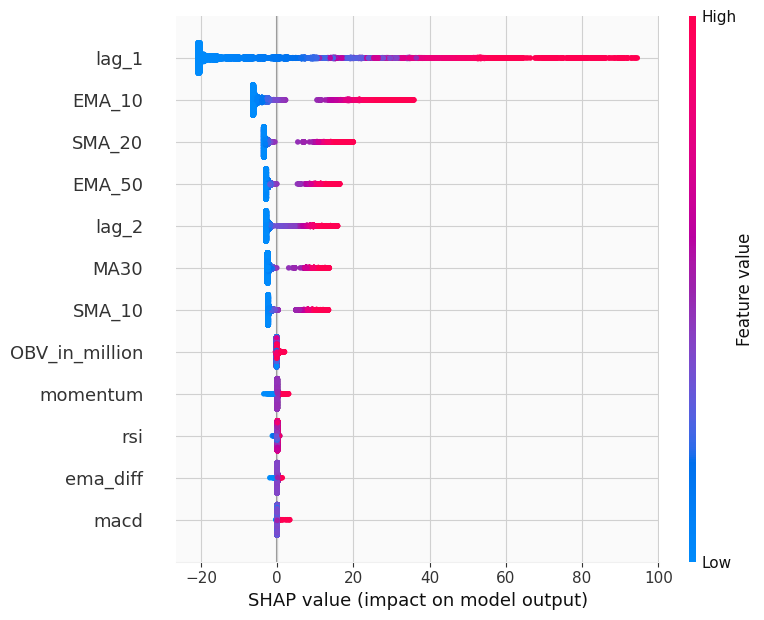

In [ ]:
# Example: fit RandomForest and apply SHAP
import shap
from sklearn.ensemble import RandomForestRegressor

X = df[['MA30','lag_1','SMA_20','lag_2','EMA_50','momentum', 'EMA_10', 'ema_diff','SMA_10', 'rsi', 'macd', 'OBV_in_million']].dropna()
y = df['Close'].loc[X.index]

model = RandomForestRegressor()
model.fit(X, y)

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)


#Linear regression

In [41]:
# === Step 1: Feature Selection ===
features = ['Close', 'EMA_10', 'momentum', 'lag_1']
selected_data = df_clean[features]  # No transformation yet

In [42]:
# === Scaling and preparing data ===
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)
scaled_df = pd.DataFrame(scaled_data, columns=features, index=selected_data.index)

In [43]:
# === Step 2: Supervised Data Creation (Lookback Window) ===
def create_linear_features(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        # Flatten 60-day window into 1D array for linear regression
        window = data[i - seq_len:i].flatten()
        X.append(window)
        y.append(data[i, 0])  # Target is the scaled 'Close' price
    return np.array(X), np.array(y)

lookback = 60
X, y = create_linear_features(scaled_data, seq_len=lookback)


In [44]:
# === Step 3: Train-Test Split (70/30) ===
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [45]:
# === Step 4: Train Linear Regression Model ===
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [46]:
# === Step 5: Predict on Test Data ===
y_pred_scaled = lin_reg.predict(X_test)

In [47]:
# === Step 6: Inverse Scaling to Get Predictions in Original Price ===
num_extra_features = len(features) - 1

# Pad with zeros to match original feature count before inverse_transform
y_pred_full = np.concatenate(
    [y_pred_scaled.reshape(-1, 1), np.zeros((len(y_pred_scaled), num_extra_features))], axis=1)
y_test_full = np.concatenate(
    [y_test.reshape(-1, 1), np.zeros((len(y_test), num_extra_features))], axis=1)

# Inverse transform to get actual price values
y_pred_unscaled = scaler.inverse_transform(y_pred_full)[:, 0]
y_test_unscaled = scaler.inverse_transform(y_test_full)[:, 0]

In [51]:
# === Step 7: Evaluate Model Performance ===
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
rmse = np.sqrt(mse)
print("\nLinear Regression Evaluation:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")


Linear Regression Evaluation:
MAE  : 1.51
MSE  : 5.88
RMSE : 2.43


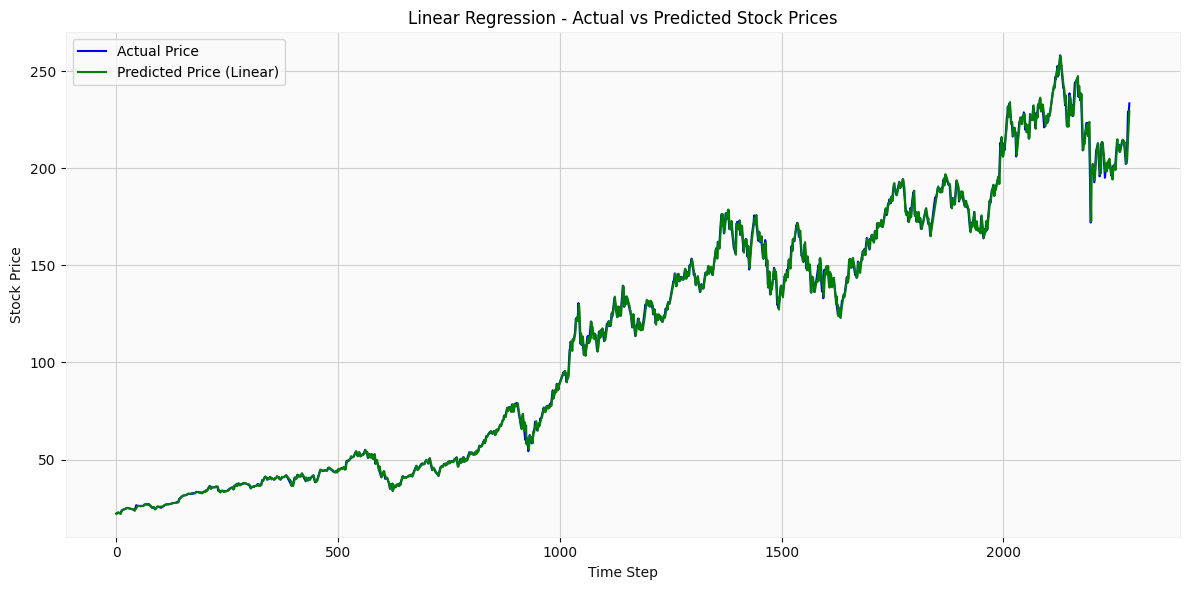

In [50]:
# === Step 8: Plot Actual vs Predicted Prices ===
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Actual Price', color='blue')
plt.plot(y_pred_unscaled, label='Predicted Price (Linear)', color='green')
plt.title("Linear Regression - Actual vs Predicted Stock Prices")
plt.xlabel("Time Step")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#LSTM Model Architeture

In [ ]:
# === Select features ===
selected_features = ['Close', 'EMA_10', 'momentum', 'lag_1']

In [ ]:
# === Scaling and preparing data ===
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_clean[selected_features])

In [ ]:
# === Sequence generation ===
def create_sequences(data, lookback=60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i])
        y.append(data[i, 0])  # 'Close' is target (index 0)
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, lookback=60)

In [ ]:
# === Train/test split ===
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# === LSTM Model ===
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(100, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# === Early stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# === Train model ===
history = model.fit( X_train, y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stop],verbose=1)

Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 15s 90ms/step - loss: 3.8401e-04 - val_loss: 1.3338e-05
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - loss: 1.4048e-05 - val_loss: 1.1061e-05
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 9.4405e-06 - val_loss: 1.2230e-05
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - loss: 7.8088e-06 - val_loss: 1.3362e-05
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 7.1936e-06 - val_loss: 1.3522e-05
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - loss: 5.6997e-06 - val_loss: 2.2732e-05
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - loss: 4.7115e-06 - val_loss: 2.6845e-05


In [ ]:
# === Predict on test data ===
predicted = model.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


In [ ]:
# === Inverse transform predictions ===
extra_features = len(selected_features) - 1
predicted_padded = np.concatenate([predicted, np.zeros((len(predicted), extra_features))], axis=1)
y_test_padded = np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), extra_features))], axis=1)

predicted_prices = scaler.inverse_transform(predicted_padded)[:, 0]
actual_prices = scaler.inverse_transform(y_test_padded)[:, 0]

In [ ]:
# === Evaluation metrics ===
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

print("\n📊 LSTM Model Evaluation on Test Set (Real Price Scale)")
print(f"MAE   (Mean Absolute Error):     {mae:.2f}")
print(f"MSE   (Mean Squared Error):      {mse:.2f}")
print(f"RMSE  (Root Mean Squared Error): {rmse:.2f}")


📊 LSTM Model Evaluation on Test Set (Real Price Scale)
MAE   (Mean Absolute Error):     6.33
MSE   (Mean Squared Error):      91.61
RMSE  (Root Mean Squared Error): 9.57


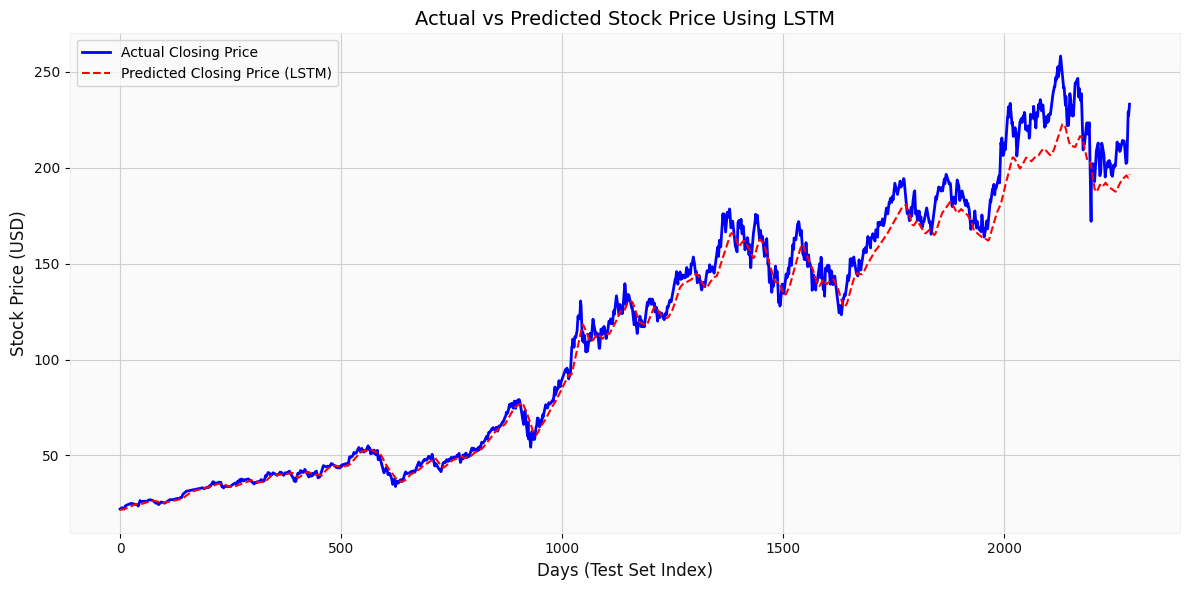

In [ ]:
# === Plot: Actual vs Predicted ===
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Closing Price', color='blue', linewidth=2)
plt.plot(predicted_prices, label='Predicted Closing Price (LSTM)', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Price Using LSTM', fontsize=14)
plt.xlabel('Days (Test Set Index)', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Hyperparameter tunning

In [ ]:
def build_model(hp):
    model = Sequential()

    # Tune number of LSTM units (64–256)
    model.add(LSTM(units=hp.Int('lstm_units_1', min_value=64, max_value=256, step=32),
                   return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))

    # Tune dropout (0.1–0.5)
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=128, step=32),
                   return_sequences=False))

    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))

    # Tune learning rate (1e-4 to 1e-2)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error'
    )

    return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # You can increase for more thorough search
    executions_per_trial=1,
    overwrite=True,
    directory='lstm_tuner',
    project_name='stock_forecast'
)


In [ ]:
tuner.search(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
    verbose=1
)


Trial 5 Complete [00h 04m 17s]
val_loss: 1.034245542541612e-05

Best val_loss So Far: 9.029473403643351e-06
Total elapsed time: 00h 34m 07s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
print(f"LSTM units 1: {best_hps.get('lstm_units_1')}")
print(f"Dropout 1: {best_hps.get('dropout_1')}")
print(f"LSTM units 2: {best_hps.get('lstm_units_2')}")
print(f"Dropout 2: {best_hps.get('dropout_2')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")


Best hyperparameters:
LSTM units 1: 160
Dropout 1: 0.2
LSTM units 2: 96
Dropout 2: 0.4
Learning Rate: 0.01


In [ ]:
best_model = tuner.hypermodel.build(best_hps)

history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
    verbose=1
)


Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 28s 179ms/step - loss: 0.0145 - val_loss: 1.0636e-05
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - loss: 3.4677e-05 - val_loss: 1.6169e-05
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 182ms/step - loss: 2.2520e-05 - val_loss: 8.8626e-06
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 176ms/step - loss: 1.7035e-05 - val_loss: 9.9008e-06
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 178ms/step - loss: 1.5760e-05 - val_loss: 8.0942e-06
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 40s 176ms/step - loss: 1.0623e-05 - val_loss: 5.1803e-05
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - loss: 1.0147e-05 - val_loss: 9.0631e-06
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 183ms/step - loss: 8.1136e-06 - val_loss: 1.0159e-05
Epoch 9/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 175ms/step - loss: 7.6483e-06 - val_loss: 7.6656e-06
Epoch 10/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step - loss: 6.0057e-06 - val_loss: 1.1449e-05
Epoch 11/100
134/134 ━━

In [ ]:
# === Predict scaled values using best model ===
y_pred_scaled = best_model.predict(X_test)

# === Reconstruct full feature set for inverse transform ===
n_features = X_train.shape[2]

y_pred_full = np.zeros((len(y_pred_scaled), n_features))
y_pred_full[:, 0] = y_pred_scaled[:, 0]  # Only 'Close' is predicted

y_test_full = np.zeros((len(y_test), n_features))
y_test_full[:, 0] = y_test

# === Inverse scale back to original prices ===
y_pred_inverse = scaler.inverse_transform(y_pred_full)[:, 0]
y_test_inverse = scaler.inverse_transform(y_test_full)[:, 0]

# === Evaluation metrics ===
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

print("\n📊 Best LSTM Model Evaluation (Real Scale)")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")


72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step

📊 Best LSTM Model Evaluation (Real Scale)
MAE  : 4.96
MSE  : 48.65
RMSE : 6.97
R²   : 0.99


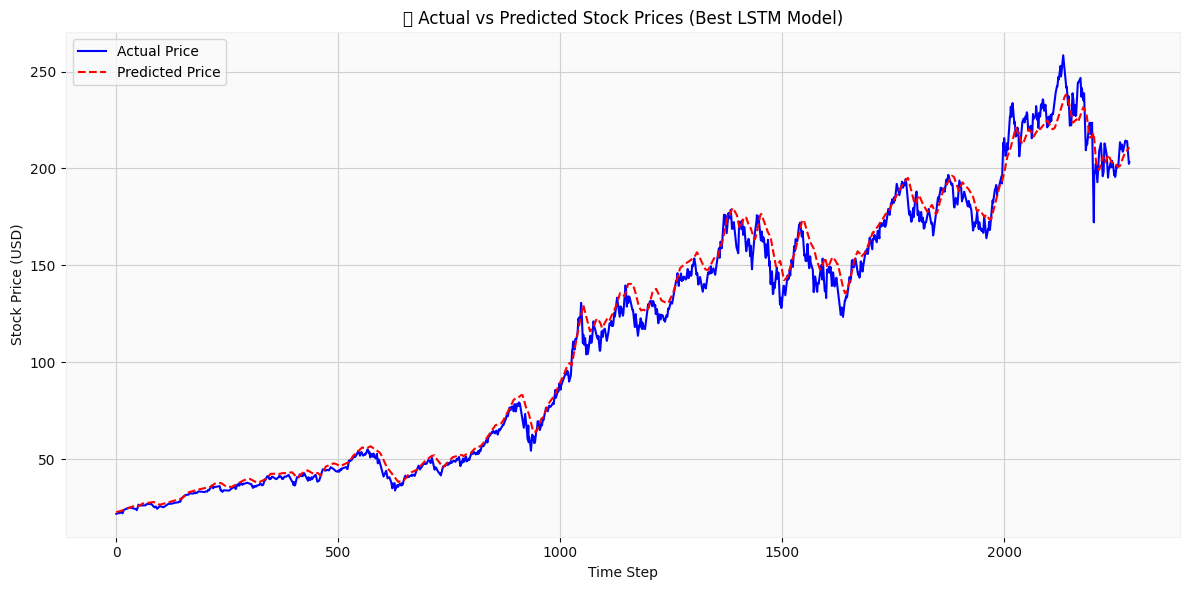

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Price', color='blue')
plt.plot(y_pred_inverse, label='Predicted Price', color='red', linestyle='--')
plt.title('📈 Actual vs Predicted Stock Prices (Best LSTM Model)')
plt.xlabel('Time Step')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Stacking Ensemble

#Decision Tree

In [ ]:
# Trim to the shortest length to avoid misalignment
min_len = min(len(y_pred_unscaled), len(y_pred_inverse), len(y_test_unscaled))

# Ensure aligned
y_pred_unscaled = y_pred_unscaled[:min_len]
y_pred_inverse = y_pred_inverse[:min_len]
y_test_unscaled = y_test_unscaled[:min_len]


In [ ]:
# 1. Prepare input features for meta-model
stacked_inputs = np.column_stack((y_pred_unscaled, y_pred_inverse))

# 2. Use true values as targets (ensure same shape)
# You can use y_test_unscaled or y_test_inverse — both should be identical
stacked_target = y_test_unscaled  # or y_test_inverse

# 3. Train meta-learner (Decision Tree)
meta_model = DecisionTreeRegressor(max_depth=5, random_state=42)
meta_model.fit(stacked_inputs, stacked_target)

# 4. Predict final output using ensemble
final_predictions = meta_model.predict(stacked_inputs)

# 5. Evaluate the stacked model
mae = mean_absolute_error(stacked_target, final_predictions)
mse = mean_squared_error(stacked_target, final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(stacked_target, final_predictions)

print("\n📊 Stacking Ensemble Evaluation (Decision Tree on LR + LSTM)")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")


📊 Stacking Ensemble Evaluation (Decision Tree on LR + LSTM)
MAE  : 2.04
MSE  : 8.53
RMSE : 2.92
R²   : 1.00


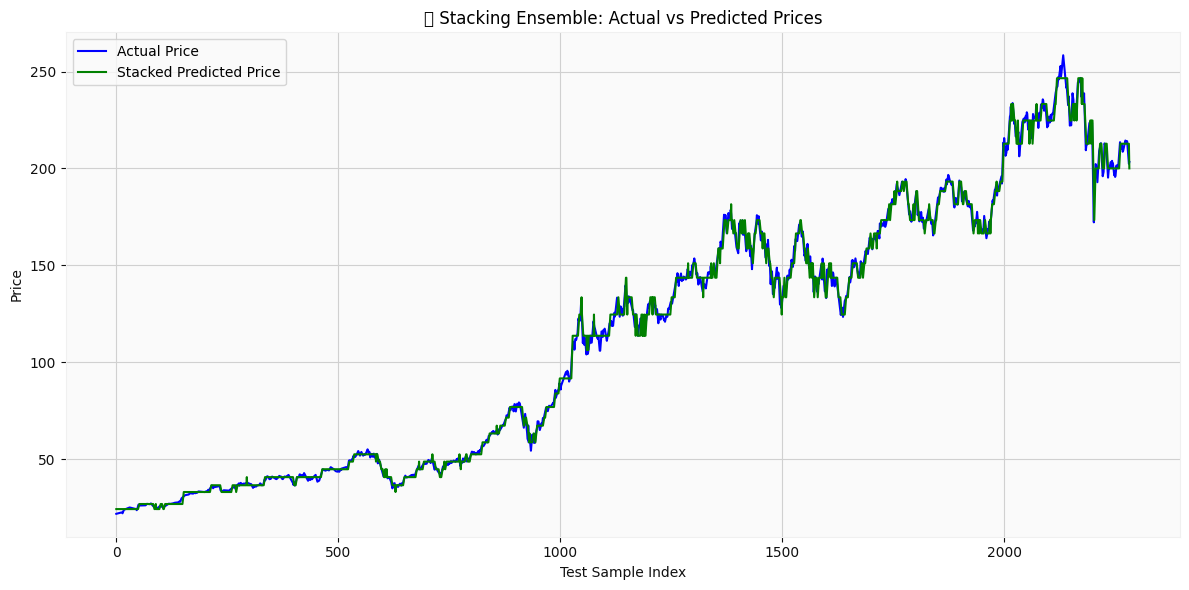

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(stacked_target, label='Actual Price', color='blue')
plt.plot(final_predictions, label='Stacked Predicted Price', color='green')
plt.title("📈 Stacking Ensemble: Actual vs Predicted Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#XGBOOST

In [ ]:
# These are your model predictions:
linear_preds = y_pred_unscaled    # From Linear Regression
lstm_preds = y_pred_inverse       # From LSTM
true_values = y_test_unscaled     # Ground truth

In [ ]:
# Stack base model predictions as features
stacked_features = np.column_stack((linear_preds, lstm_preds))

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(stacked_features, true_values)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
ensemble_preds = xgb_model.predict(stacked_features)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(true_values, ensemble_preds)
mse = mean_squared_error(true_values, ensemble_preds)
rmse = np.sqrt(mse)
r2 = r2_score(true_values, ensemble_preds)

print("\n📊 Stacking Ensemble (XGBoost) Evaluation:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")


📊 Stacking Ensemble (XGBoost) Evaluation:
MAE  : 1.43
MSE  : 4.82
RMSE : 2.20


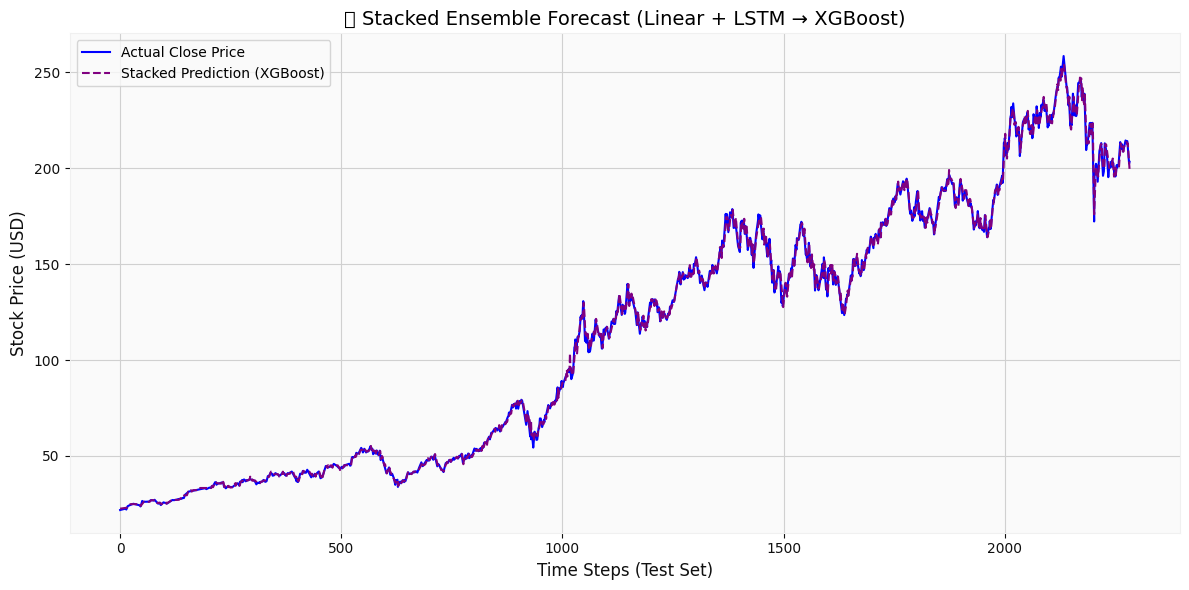

In [ ]:
# === Step 5: Plot Actual vs Ensemble Prediction ===
plt.figure(figsize=(12, 6))
plt.plot(true_values, label='Actual Close Price', color='blue')
plt.plot(ensemble_preds, label='Stacked Prediction (XGBoost)', color='purple', linestyle='--')
plt.title("📉 Stacked Ensemble Forecast (Linear + LSTM → XGBoost)", fontsize=14)
plt.xlabel("Time Steps (Test Set)", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()